In [1]:
%run 00_analysis_config.ipynb

Welcome to JupyROOT 6.22/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
# modules in this directory
import visualization, util, event, cutflow, detector
importlib.reload(event)
importlib.reload(visualization)
importlib.reload(util)
importlib.reload(detector)
import visualization as vis

import lsfit
reload(lsfit)

import include_modules_root as rt
#import gen_auxiliary as GAX
import Kalman_tom


In [3]:
# Figure save path prefix
savefig.fig_prefix = "/home/knownothing/"    # It's good to keep figures in a separate folder. Can also be set to None.
savefig.SAVE = True        # Use this flag to turn the figure saving on or off, so that you don't need to modify all notebook to save figure.

In [4]:
def eta2theta(eta):
    return 2*np.arctan(np.exp(-eta))*57.2
def theta2eta(theta):
    return -np.log(np.tan(theta/2))
eta_min=np.arctan(65.5/169.5)
eta_min_eff=theta2eta(eta_min)
eta_max=np.arctan((65.5+30)/69.5)
eta_max_eff=theta2eta(eta_max)
phi=np.arctan(50/69.5)
cms=util.coord_cms2sim([0,0,0])
det_cent=util.coord_det2sim([4.5,0,-12.5])
r=det_cent-cms
sumr=np.sqrt(np.sum(r**2))
r/sumr

array([ 0.86175551,  0.        , -0.50732381])

In [445]:
theta2eta(np.arctan( (20 + 65.5)/169.5))

1.4357619802012112

In [5]:
import random
def spherepicking(n):
    while True:           #to get rid off [0,0,0,0] case
        l = [random.gauss(0, 1) for i in range(n)]
        sumsq = sum([x * x for x in l])
        if sumsq > 0:
            break
    norm = 1.0 / math.sqrt(sumsq)
    pt = [x * norm for x in l]
    return pt

print(spherepicking(4))


[-0.17465435131547388, 0.8609676242510395, -0.39633798332917125, -0.26673359467576924]


In [ ]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
p_unit=[]
for i in range(1000):
    pt=spherepicking(4)     
    p_unit.append((np.array([pt[0], pt[1], -pt[2]])))

    ax.scatter(*p_unit[i])
ax.set_aspect('auto')
plt.show()

### Generate simulation script

The script is then submitted with the python file in scripts/submit_jobs_singletrack_large_angle.py

In [ ]:
#-------------------
reload(GAX)
# 1. Gun at the center of the module
#(nevents,ID,GeV,name)
GAX.Vertex_Gun(60000,11,100,"100_GeV_ele")
GAX.Vertex_Gun(60000,211,100,"100_GeV_pion") 

### Check the angle range

In [ ]:
file=GAX.get_newest("/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/Grid/Angular")
filenames = [f"/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/Grid/Angular/20230605/{file}/run0.root",f"{file}/muon_100_GeV_CMS//20230518/180557/run0.root",]
filenames_recon = [f"/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/Grid/Angular/20230605/{file}/stat0.root",f"{file}/muon_100_GeV_CMS//20230518/180557/stat_seedmod.root",]
print("./tracker",filenames[0], f"/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/Grid/Angular/20230605/{file}")

In [ ]:
tree_name = "box_run"
file="/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/wide_angle/pion/1_Gev_pion/175915/run0.root"
vis.plot_multiple_events(file, tree_name, nevents=600)
#vis.plot_multiple_events(filenames[1], tree_name, nevents=600)


# Efficiency vs angle

In [5]:
Data_Dir="/home/knownothing/Downloads/20230605/063043/"
Data_Dir_="/home/knownothing/Downloads/"
entries = os.listdir(Data_Dir_)
filenames=[]
for file in entries:
    filenames.append(file)
print(filenames)

['20230605', 'ASRS_software_summer_internship_2023.pdf', 'hermatic.root', 'Image Filtering', 'unnamed.jpg', 'wp6100620-tokyo-night-wallpapers.jpg', 'CIE_447_Proj', 'output.wav', '2w_mod.root', 'stat0.root', 'run0.root', 'Canvas_1.jpg', 'Run_HIFIGAN.py', 'MATHUSLA-Kalman-Algorithm-seed_dev.zip', 'x_digi.jpg', 'Muon System Monitoring.pptx', 'Wide angle Analysis.pptx', 'wp6128486-tokyo-night-wallpapers.jpg', 'tmpdir_vocoder', 'Anaconda3-2023.03-1-Linux-x86_64.sh', 'Muon System Monitoring 6_26 - 7_10 Summery.pptx', 'cuts.root', '20230605.tar.xz', 'tmpdir_tts']


In [141]:
file=f"{Data_Dir_}/stat0.root"
fill=lsfit.get_km(file)
truth=fill["truth"]
reco=fill["recon"]

  0%|          | 0/52128 [00:00<?, ?it/s]/home/knownothing/Mathusla_Effeciency_Grid-main/lsfit.py:249: RuntimeWarning: invalid value encountered in sqrt
  results_fit["recon_error"].append(np.sqrt(par_km_error))
100%|██████████| 52128/52128 [01:19<00:00, 659.10it/s] 
/home/knownothing/Mathusla_Effeciency_Grid-main/lsfit.py:258: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  results_fit[key]=np.array(results_fit[key])


In [156]:
data=dict_[0]
reco=data["recon"]
truth=data["truth"]


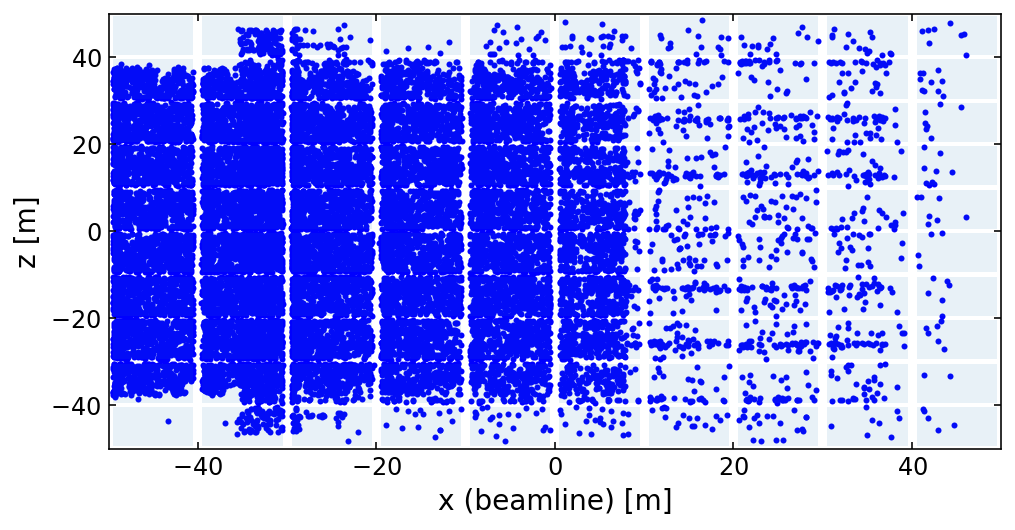

In [161]:
fig,axs=plt.subplots(figsize=(8,4))
xlabels=["x (beamline) [m]", "z [m]"]
track=[]
x=[]
z=[]
for i in range(len(truth)):
    if data["floor_hit"][i]==True:
        track.append(util.coord_cms2det([reco[i][0],reco[i][1],reco[i][2]]))
    else:
        continue 
for i in range(len(track)):
    x.append(track[i][0])
    z.append(track[i][1])
    
axs.scatter(x,z, marker=".",color="b",linewidths=0.005)
vis.drawdet_xy(axis=axs)
axs.set_xlabel(xlabels[0])
axs.set_ylabel(xlabels[1])
ylim(-50,50)
xlim(-50,50)
plt.show()


In [548]:
Data_Dir="/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/wide_angle/Results"
entries = os.listdir(Data_Dir)
filenames=[]
for file in entries:
    filenames.append(file)
print(filenames)


['0.1_GeV_pion.root', '1_GeV_pion.root', '0.1_GeV_muon.root', '100_GeV_muon.root', '0.1_GeV_electron.root', '1_GeV_electron.root', '10_GeV_electron.root', '10_GeV_muon.root', '5_GeV_muon.root', '1_GeV_muon.root', '10_Gev_pion.root']


In [549]:
def Plot_eff(self,filename):
    reload(rt)
    self.bins={}
    for file in filename:
        self.bins[f"{file}_bincenters"]=[]
        self.bins[f"{file}_TIGHT"]=[]
        self.bins[f"{file}_LOOSER"]=[]
        data = lsfit.get_km(f"{Data_Dir}/{file}")
        data["theta"] = np.arccos(data["truth"][:,5]/np.sqrt(data["truth"][:,4]**2 + data["truth"][:,5]**2 + data["truth"][:,6]**2))
        recon = data["recon"]
        truth = data["truth"]
        diffx = recon[:,2]-truth[:,2]
        diffy = recon[:,0]-truth[:,0]
        diffvx = recon[:,6]-truth[:,6]
        diffvy = recon[:,4]-truth[:,4] 
        mask_TIGHT  = (np.abs(diffx)<5) & (np.abs(diffy)<5) & (np.abs(diffvx)<0.5) & (np.abs(diffvy)<0.5)
        mask_LOOSER = (np.abs(diffx)<10) & (np.abs(diffy)<10) & (np.abs(diffvx)<1) & (np.abs(diffvy)<1)   
        pass_=[]
        tot_=[]
        pass_t=[]
        n_cuts = 25
        bins_loc = np.linspace(-np.arctan(44.5/8), np.arctan(44.5/8), n_cuts+1)
        bincenters_loc = 0.5*(bins_loc[1:]+bins_loc[:-1])
        self.bins[f"{file}_bincenters"]=np.array(bincenters_loc)
        
        eff = []
        eff_t = []
        pass_=[]
        tot_=[]
        pass_t=[]
        for i in range(n_cuts):
            mask = (data["theta"]>bins_loc[i])&(data["theta"]<bins_loc[i+1])
            n_pass = sum(data["mask_recon_success"]&mask_LOOSER&mask)
            n_pass_t = sum(data["mask_recon_success"]&mask_TIGHT&mask)
            n_total = sum(mask)
            pass_.append(n_pass)
            pass_t.append(n_pass_t)
            tot_.append(n_total)
            eff.append(n_pass/n_total)
            eff_t.append(n_pass_t/n_total)
    
        track_efficiency=rt.BayesDivide(pass_,tot_)
        track_efficiency_t=rt.BayesDivide(pass_t,tot_)
        self.bins[f"{file}_TIGHT"]=np.array([eff_t,track_efficiency_t])
        self.bins[f"{file}_LOOSER"]=np.array([eff,track_efficiency])


In [550]:
Plot_eff(Plot_eff,filenames)

  0%|          | 0/58311 [00:00<?, ?it/s]/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/lsfit.py:249: RuntimeWarning: invalid value encountered in sqrt
  results_fit["recon_error"].append(np.sqrt(par_km_error))
100%|██████████| 58311/58311 [00:11<00:00, 5262.49it/s]
/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/lsfit.py:258: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  results_fit[key]=np.array(results_fit[key])
/home/cfpuser/.conda/envs/tracker/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in long_scalars
/home/cfpuser/.conda/envs/tracker/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in long_scalars
/home/cfpuser/.conda/envs/tracker/lib/python3.7/site-pack

In [552]:
bincenters=Plot_eff.bins['1_GeV_pion.root_bincenters']
#LOOSE
TR_pion_LOOSE=np.array([Plot_eff.bins["0.1_GeV_pion.root_LOOSER"],Plot_eff.bins['1_GeV_pion.root_LOOSER']])
TR_muon_LOOSE=np.array([Plot_eff.bins["0.1_GeV_muon.root_LOOSER"],Plot_eff.bins['1_GeV_muon.root_LOOSER'],Plot_eff.bins['5_GeV_muon.root_LOOSER'],Plot_eff.bins['10_GeV_muon.root_LOOSER'],Plot_eff.bins['100_GeV_muon.root_LOOSER']])
TR_ele_LOOSE=np.array([Plot_eff.bins["0.1_GeV_electron.root_LOOSER"],Plot_eff.bins['1_GeV_electron.root_LOOSER'],Plot_eff.bins['10_GeV_electron.root_LOOSER']])
#TIGHT
TR_pion_TIGHT=np.array([Plot_eff.bins["0.1_GeV_pion.root_TIGHT"],Plot_eff.bins['1_GeV_pion.root_TIGHT']])
TR_muon_TIGHT=np.array([Plot_eff.bins["0.1_GeV_muon.root_TIGHT"],Plot_eff.bins['1_GeV_muon.root_TIGHT'],Plot_eff.bins['5_GeV_muon.root_TIGHT'],Plot_eff.bins['10_GeV_muon.root_TIGHT'],Plot_eff.bins['100_GeV_muon.root_TIGHT']])
TR_ele_TIGHT=np.array([Plot_eff.bins["0.1_GeV_electron.root_TIGHT"],Plot_eff.bins['1_GeV_electron.root_TIGHT'],Plot_eff.bins['10_GeV_electron.root_TIGHT']])
#Energy Wise comparison
Cross_part_01=np.array([Plot_eff.bins["0.1_GeV_muon.root_LOOSER"],Plot_eff.bins["0.1_GeV_electron.root_LOOSER"],Plot_eff.bins["0.1_GeV_pion.root_LOOSER"]])
Cross_part_1=np.array([Plot_eff.bins["1_GeV_muon.root_LOOSER"],Plot_eff.bins["1_GeV_electron.root_LOOSER"],Plot_eff.bins["1_GeV_pion.root_LOOSER"]])
Cross_part_10=np.array([Plot_eff.bins["10_GeV_muon.root_LOOSER"],Plot_eff.bins['10_GeV_electron.root_LOOSER'],Plot_eff.bins["10_Gev_pion.root_LOOSER"]])


In [553]:
#Cross Particle Analysis


In [554]:
def Plot_Results(bincenters,track_efficiency,cut,part,title):
    energy=["0.1_GeV/c","1_GeV/c","5_GeV/c","10_GeV/c","100_GeV/c"]
    part=["$/mu","e-","$/pi"]
    i=0
    for effn in track_efficiency:
        plt.errorbar(bincenters/np.pi*180, effn[1][0],yerr=[effn[1][1],effn[1][2]],fmt=".", capsize=2)
        if part == part:
            plot(bincenters/np.pi*180,effn[0] ,label=f"{cut}_{part[i]}" )
        else:
            plot(bincenters/np.pi*180,effn[0] ,label=f"{cut}_{energy[i]}" )
        i=i+1
    angle_firstgap = np.array([np.arctan(4.5/12),np.arctan(5.5/7)]    )
    angle_secondgap = np.array([np.arctan(14.5/12),np.arctan(15.5/7)]    )

    

    axvspan(*angle_firstgap/np.pi*180, alpha=0.1)
    axvspan(*angle_secondgap/np.pi*180, alpha=0.3)

    xlabel(r"$\theta$ [$^{\circ}$]")
    ylabel("Efficiency")
    plt.title(f"{title}")
    legend(fontsize="8")
    ylim(-0.1,1)
    xlim(-2,80)
    plt.show()
    

findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


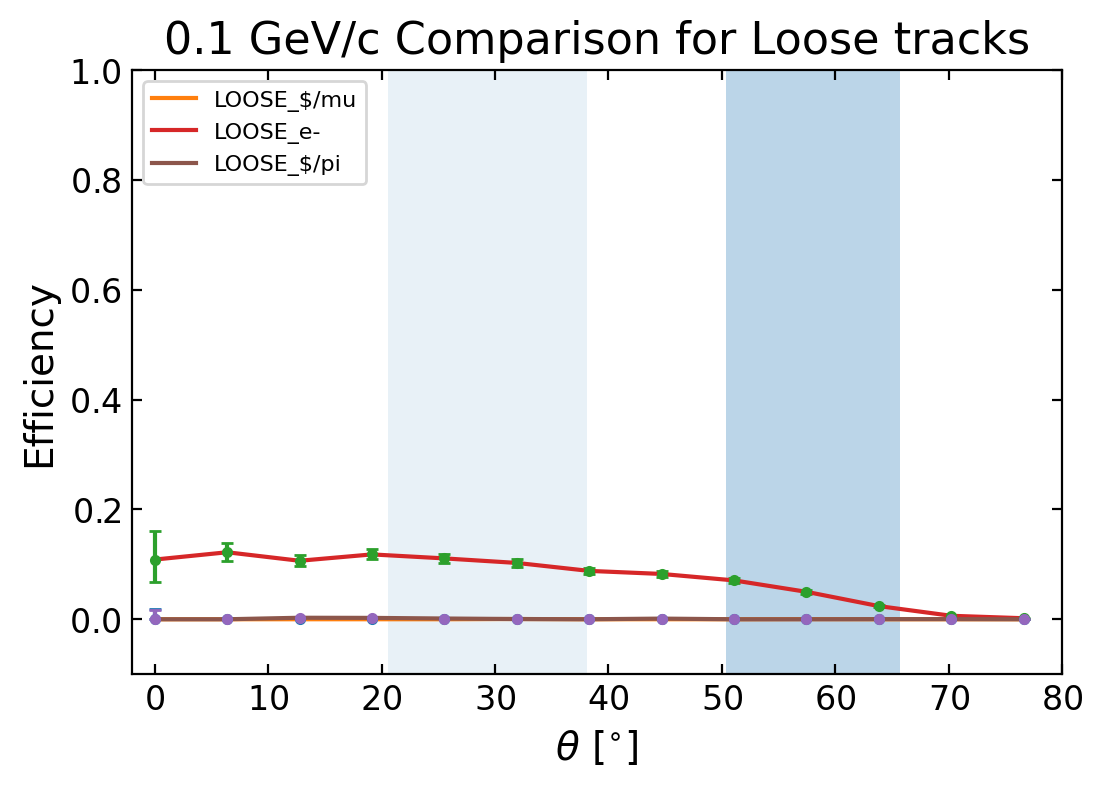

In [555]:
Plot_Results(Plot_eff.bins['1_GeV_muon.root_bincenters'],Cross_part_01,"LOOSE","part","0.1 GeV/c Comparison for Loose tracks")

In [557]:
data=lsfit.get_km("/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/wide_angle/Results/1_GeV_muon.root")
data["theta"] = np.arccos(data["truth"][:,5]/np.sqrt(data["truth"][:,4]**2 + data["truth"][:,5]**2 + data["truth"][:,6]**2))
recon = data["recon"]
truth = data["truth"]
diffx = recon[:,2]-truth[:,2]
diffy = recon[:,0]-truth[:,0]
diffvx = recon[:,6]-truth[:,6]
diffvy = recon[:,4]-truth[:,4] 
mask_TIGHT  = (np.abs(diffx)<5) & (np.abs(diffy)<5) & (np.abs(diffvx)<0.5) & (np.abs(diffvy)<0.5)
mask_LOOSER = (np.abs(diffx)<10) & (np.abs(diffy)<10) & (np.abs(diffvx)<1) & (np.abs(diffvy)<1)

  0%|          | 0/53033 [00:00<?, ?it/s]/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/lsfit.py:249: RuntimeWarning: invalid value encountered in sqrt
  results_fit["recon_error"].append(np.sqrt(par_km_error))
100%|██████████| 53033/53033 [00:13<00:00, 3900.92it/s]
/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/lsfit.py:258: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  results_fit[key]=np.array(results_fit[key])


In [582]:
len(data["mask_recon_success"])

53033

/home/cfpuser/.conda/envs/tracker/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars
/home/cfpuser/.conda/envs/tracker/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


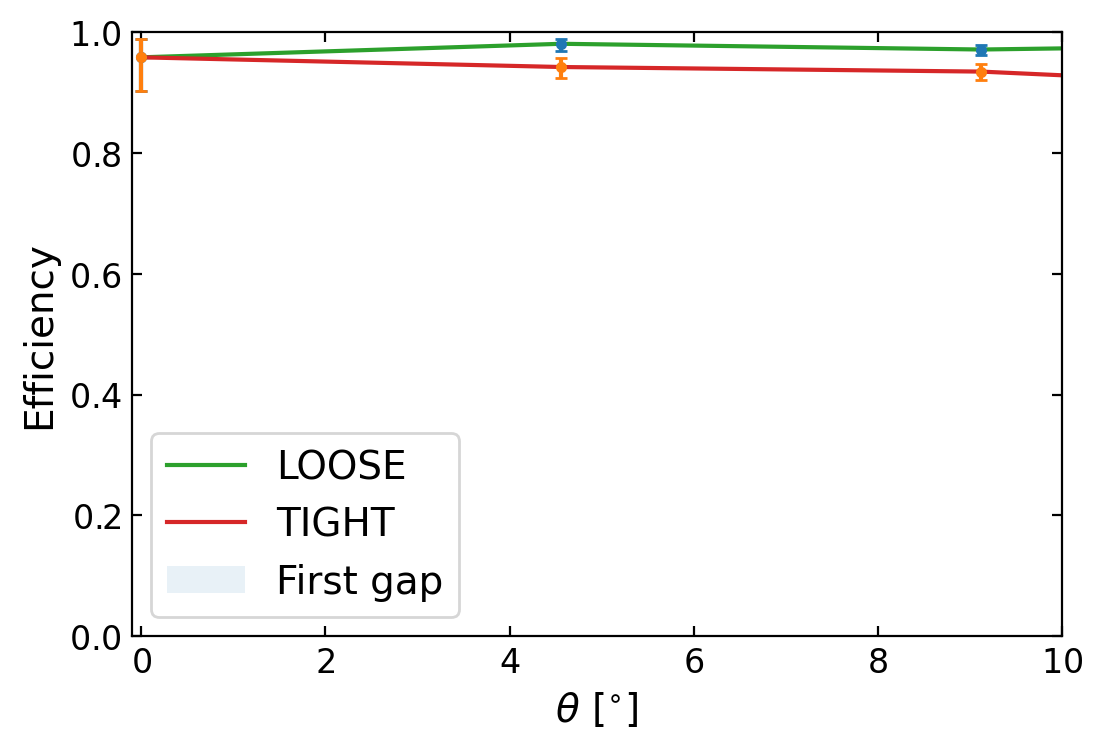

In [593]:
reload(rt)
pass_=[]
pass_t=[]
tot_=[]

n_cuts =35
bins = np.linspace(-np.arctan(44.5/8), np.arctan(44.5/8), n_cuts+1)
bincenters = 0.5*(bins[1:]+bins[:-1])
eff = []
eff_t = []
for i in range(n_cuts):
    mask = (data["theta"]>bins[i])&(data["theta"]<bins[i+1])
    n_pass = sum(data["mask_recon_success"]&mask_LOOSER&mask)
    n_pass_t = sum(data["mask_recon_success"]&mask_TIGHT&mask)
    n_total = sum(mask&data["mask_recon_success"])
    pass_.append(n_pass)
    pass_t.append(n_pass_t)
    tot_.append(n_total)
    eff.append(n_pass/n_total)
    eff_t.append(n_pass_t/n_total)
    
track_efficiency=rt.BayesDivide(pass_,tot_)
track_efficiency_t=rt.BayesDivide(pass_t,tot_)
plt.errorbar(bincenters/np.pi*180, track_efficiency[0],yerr=[track_efficiency[1],track_efficiency[2]],fmt=".", capsize=2)
plt.errorbar(bincenters/np.pi*180, track_efficiency_t[0],yerr=[track_efficiency_t[1],track_efficiency_t[2]],fmt=".", capsize=2)

angle_firstgap = np.array([np.arctan(4.5/12),np.arctan(5.5/7)]    )
angle_secondgap = np.array([np.arctan(14.5/12),np.arctan(15.5/7)]    )

plot(bincenters/np.pi*180,eff ,label="LOOSE" )
plot(bincenters/np.pi*180,eff_t,label="TIGHT")
axvspan(*angle_firstgap/np.pi*180, alpha=0.1,label="First gap")
axvspan(*angle_secondgap/np.pi*180, alpha=0.3)

xlabel(r"$\theta$ [$^{\circ}$]")
ylabel("Efficiency")
legend()
ylim(0,1)
xlim(-0.1,10)
plt.show()

In [148]:
Data_Dir="/home/knownothing/Downloads/20230605/063043/"
Data_Dir_="/home/knownothing/Downloads/"
entries = os.listdir(Data_Dir_)
filenames=[]
for file in entries:
    filenames.append(file)
print(filenames)

['20230605', 'ASRS_software_summer_internship_2023.pdf', 'hermatic.root', 'Image Filtering', 'wp6100620-tokyo-night-wallpapers.jpg', 'CIE_447_Proj', 'output.wav', '2w_mod.root', 'stat0.root', 'run0.root', 'Canvas_1.jpg', 'Run_HIFIGAN.py', 'MATHUSLA-Kalman-Algorithm-seed_dev.zip', 'x_digi.jpg', 'Wide angle Analysis.pptx', 'wp6128486-tokyo-night-wallpapers.jpg', 'tmpdir_vocoder', 'Anaconda3-2023.03-1-Linux-x86_64.sh', 'cuts.root', '20230605.tar.xz', 'tmpdir_tts']


In [103]:
files=[f"{Data_Dir_}/stat0.root",f"{Data_Dir_}/hermatic.root"]
dict_=[]
for i in range(len(files)):
    data={}
    data=lsfit.get_km(files[i])
    mask=data["mask_recon_success"]
    recon= data["recon"]
    unc=data["recon_error"]
    truth=data["truth"]
    mag_vel=(np.sqrt(data["truth"][:,4]**2 + data["truth"][:,5]**2 + data["truth"][:,6]**2))

    floor=[]
    recalc=[]
    dist=[]
    time=[]
    residual=[]
    wall=[]
    residual_old=[]
    uncert=[]
    for tt in range(len(truth)):
    
    #recalculating Truth at y_recon
        recalc.append([truth[tt][0] - (truth[tt][1]-recon[tt][1])/truth[tt][5] * truth[tt][4], recon[tt][1] , truth[tt][2] - (truth[tt][1]-recon[tt][1])/truth[tt][5] * truth[tt][6]])
    #propgating time
    # we have t0 at y_truth, we get the distance between xyz truth and xyz frome the recalculated truth at recon layer
    #use mag velocity and distance to get del(t) new propgated time is t0 + del(t)  
        dist.append(np.sqrt((recalc[tt][0]-truth[tt][0])**2+(recalc[tt][1]-truth[tt][1])**2+(recalc[tt][2]-truth[tt][2])**2))
        time.append(truth[tt][3]+dist[tt]/mag_vel[tt])

    for tt in range(len(mask)):
  
        residual_old.append([recon[tt][0]-truth[tt][0],recon[tt][2]-truth[tt][2],recon[tt][3]-truth[tt][3],recon[tt][4]-truth[tt][4],recon[tt][5]-truth[tt][5],recon[tt][6]-truth[tt][6]])
        residual.append([recon[tt][0]-recalc[tt][0],recon[tt][2]-recalc[tt][2],recon[tt][3]-time[tt],recon[tt][4]-truth[tt][4],recon[tt][5]-truth[tt][5],recon[tt][6]-truth[tt][6]])
        uncert.append([data["recon_error"][tt][0],data["recon_error"][tt][2],data["recon_error"][tt][3],data["recon_error"][tt][4],data["recon_error"][tt][5],data["recon_error"][tt][6]])
        if( 0 < truth[tt][2] < 6900  or 6900 <= truth[tt][2] < 7000  ):
            wall.append(True)
        else:
            wall.append(False)
        if( 0 < truth[tt][1] <  7000 ):    
            floor.append(True)
        else:
            floor.append(False)
    data["residual_km"]=np.array(residual)
    data["residual_km0"]=np.array(residual_old)
    data["wall_hit"]=np.array(wall)
    data["recalc"]=np.array(recalc)
    data["floor_hit"]=np.array(floor)
    data["unc"]=np.array(uncert)
    
    dict_.append(data)


  0%|          | 0/52128 [00:00<?, ?it/s]/home/knownothing/Mathusla_Effeciency_Grid-main/lsfit.py:249: RuntimeWarning: invalid value encountered in sqrt
  results_fit["recon_error"].append(np.sqrt(par_km_error))
100%|██████████| 52128/52128 [00:57<00:00, 907.96it/s] 
/home/knownothing/Mathusla_Effeciency_Grid-main/lsfit.py:258: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  results_fit[key]=np.array(results_fit[key])
100%|██████████| 52128/52128 [00:54<00:00, 951.97it/s] 


In [129]:
for i in range(len(data["wall_hit"])):
    if data["wall_hit"][i]==True:
        print(data["recon"][i][2]- data["recalc"][i][2] )

1.2539743153483869
-0.9038016019021597
1.370453796154834
-0.8781541550442853
-11.678784863499459
-0.7773225744795127
1.185311070620628
-423.6882399333881
332.7982569164633
-1603.5462722791217
0.09715218741621356
-10.665766341715425
21.98941746899618
2.9936916186579765
504.3235515637225
2.898701297540356
-971.3578264726075
2.3495619473915212
1.3514736774750418
7.716110057043807
-1.9281163248087978
1.5264521515473461
-1.2585630342773584
0.20950005165286711
1.111003935861845
-0.9565345713344868
0.05509908719614032
0.3731250358732723
-209.51192367095064
2.545045716083223
0.636801098230535
-0.5956294808702296
0.9495656421713647
-1.0224496283080953
-6.110599693509357
-2.991433359684379
48.50016470874925
0.5098776105096476
1.9076965287022176
0.4255468273131555
0.6334781274163106
-1.2439402241088828
4.989749084757932
1.5795253898168085
-2.2546733328854316
0.3326210699351577
1.6795657844568268
-0.33536396373710886
1.5691195830677316
1.0198507162658643
2.6909886162111434
8.589568661349404
0.2103

386.2979708890598
-0.7257701276648731
0.5776549695619906
2.821408247727959
-0.15401622486297128
-1120.3719764602174
2.6696045357948606
-0.3822682593936406
0.4009947126496627
-9.002415167768959
-0.6991650062427652
-0.9668041914692367
-0.7884470945391513
-0.20305310876938165
1.3587517935684446
0.5297335193445178
1.6555458069042288
1.0247079834471151
-1.6846444378825254
-1.4960259829294955
-0.2293586479181613
-1.8182603554814705
1.2095539168858522
-1.513798030486214
0.32677622342635004
-13.447188185126834
-1.2946649646255537
2.363306490130526
0.19408848089005915
-0.042447640236787265
0.8194571085305142
-4.98132054571397
-631.1142090272351
-0.4412906424859102
-0.9594524074873334
-1.229056995094652
-1.139147687618788
-1.3370844901983219
1.0359464112789283
-1.6067657480725757
-168.85091896590347
-1.203742196505118
2.8906233510160746
-0.7146864873875529
-0.459352778550965
2.222008090685449
13.601053292601136
-843.6126660669343
-0.651344401667302
-1.2319854048564594
-0.09337272500397376
-0.058

0.9467161602915439
2.6602240462689224
0.8391993798477415
344.2861499669416
0.6074905104796926
2.654605566543978
0.13733601547937724
2.211793446869706
1.4595811378785584
2.509250614298253
-0.07929921130744333
0.4275716222209667
0.8341669808933148
-519.5455366583883
2.369238378259979
6.496690749720983
3.2466263851756594
0.8205567388886266
-4.417802752026546
2.9332978948887103
0.7542304836370022
2.716851761322687
-0.7032843377955942
-0.0014575584900740068
570.0847007244629
438.64416751418867
-0.3586017111374531
0.9783085815652157
17.239829227894006
-0.11704888479471265
-1.5221572472992193
1.2204270851725596
3.44665503862052
2.485567901929244
77.97067294907083
1.0763432366147754
1.9595288919899758
517.6329153241277
53.334674257240295
-0.5189187490686891
0.8929917578170716
17.740406369949596
-0.11569701933422039
-252.26912479595558
-424.1669444628824
-1738.0758134226817
-1.025831850936811
7.515147357315982
2.319639267623643
407.01822783223906
0.9850503262987331
-2.755939317276898
-1.0497123

0.7106215656112909
4.359998504178293
0.8418984914987959
422.63342913831366
514.2514094633734
-0.95723502765577
-491.8570067149449
-681.6365087704417
411.6657862596585
1.311830097301936
3.1949156431383017
-2.4819428172831977
1.2378084036390646
1.1774894485588447
-1.7381721735328028
3.077400210982887
-173.07668828669375
0.2932470863161143
7.88815442716259
1.7548318593117074
-0.45530042791506276
1.0251963724804227
0.7020304159032094
1.849793417399269
2.4035419288575213
-1.1284476259261282
-0.9766747924231822
1.518042369350951
-0.20758172672321962
2.365390023240252
2.6650880145589326
0.8823581325268606
0.892009953953675
-2.640124109863791
-8.363972454598297
-1.6077958865644177
-390.67691616482625
1.461188486431638
3.501672399634117
-1.3591289363866963
0.6277016983513022
1.5108278201705616
2.2405709485592524
95.58602746898396
-3.9240300567253144
-1.3787937867236906
0.7058529488449494
861.7944269893851
327.322533834953
2.8297030166304467
1.739433285265477
1.7180400119432306
2.192460702899552

-1258.7664301166587
2.662241233047098
1.1846204415360262
-6.8280804770874965
2.673082001383591
-3.160066822571025
503.1585815787439
2.5596425392441233
86.00703955806603
-1.477826078693397
-11.67957156371449
0.058688544821052346
-1.3122618144216176
0.2687056900886091
408.0813502841411
2.998491339851171
-0.5395857153307588
-0.34891172317838937
2.776867309820773
-574.2681789099934
2.207102758333349
2.4541341144831677
2.116944834507194
0.4531519238571491
-2.2217086074961117
-11.756792067205424
0.6716581671589665
498.9509382960914
-2.5979673492211077
0.8938418389370781
-219.79269441430915
2.3859454699595517
-0.3865919326271978
3.468268171980526
1.7314555572465906
-1.1584916033834816
1.278394637074598
-33.75196394219165
-525.1097291784845
-1889.087327949981
89.16784964944964
-2.06630115642929
224.9157357617587
-1.9856180300575943
-822.9756898347641
3.237660094486273
-1.7731095906801784
1.2385667889166143
-250.04032172722327
7.984706555940647
0.9422391492844326
3.0013182880238674
-9.029148429

0.04196364815743436
3.014446663063609
2.454896368534719
0.2997084250664557
213.17675520237208
-54.884778496860235
-32.65720230315037
0.6612933901615179
-2.0102208207172225
1.5332050868728402
-0.7192370485990978
4.2902330724282365
-6.112192816734023
-1.7648804900727555
2.9886502918707265
1.6977547866063105
1.994676964926839
-0.711846049954147
-1.2323676996093127
1.3809898463405261
-1.077499480804363
1.002645116106578
-0.011171836240464472
0.8664655016564211
-0.7608921342407484
1.9215593530670958
-1886.4335506417992
-0.5239726408681236
0.11494440373735415
0.00663310342861223
-1.0008310563662235
0.5172590311049134
2.0920951782536577
8.650008004102347
-0.9584020559123019
-0.6432044051871344
-806.1229762877992
-663.3314651972996
-0.7870899985755386
1.218123750970335
-0.20213948734817677
2.038427075900472
-0.146742627635831
-0.6079268675230196
-1.4980483007830117
-0.6193580493254558
-1573.5495445329889
-2375.9555532882896
-502.7016625576598
13.119524919388823
2.814299208610464
-1975.88916322

-1.1766723417822504
-1.1623019934268086
-0.9226926401897799
-1.7850379010724282
-50.19393181487794
-0.9689471691463041
0.7329203768422303
0.403563496636707
-1.0138069894655928
2.0949680432895548
-2.30775931615608
-1461.352983694751
-0.0876052883995726
2.0387548898506793
12.0000187125097
1.3853269266974166
2.0239935354002228
2.0291442185780397
0.1922193736409099
-0.5432300499478515
2.5598451170944827
-1.1758555687401895
-0.596140067485976
-1150.0276276716213
1.2818218312504541
1.0101293791349235
2.436738721031361
0.7797472163747443
0.2248342534103358
-0.2186587915821292
-2.8073516710137483
393.1633710223414
17.685258200665885
1.6111963304874735
-2.178125495714994
1.804600811846285
-2304.2869447617177
8.205481898450671
1.5094507358644478
1.1723091591511547
1.1237524490543365
-830.3511455797689
-0.15061009272631054
7.568945929113397
3.2966897857213553
-1.0566543180220833
-1.0226896445337843
-2.082634799045991
2.697034335639728
0.28372006411973416
1.6393388695378235
6643.622137209182
-0.26

-2.6862854645241896
1.9062603754427982
1.6265203185284918
0.27973428688983404
-290.81252926323214
1.4169386017929355
0.9708289930140381
1.5232430484284123
-422.1383999240552
1.7952990061567107
-495.76245079784167
-1062.3861353294014
-493.00509058247735
2.547029495033712
3.0941434686619687
308.6350921656085
0.5937088126665913
-18.915525108915972
2.537604201173963
0.8015459603757336
10934.021397318153
-1.4913385706022382
-102.7275776565657
1.8522364325854141
1.2741418640362099
2.1287701932687924
-188.10015051530536
-0.5310574341210668
1.5101937287681722
0.9663635943961708
1.0570809941164043
0.5846593310116077
55.87835254496713
0.6396796407607326
0.4975349071964956
2.1873971745753806
-0.25601754415220057
2.4939707047051343
11.614838389707074
2.6295953304997965
-89.6275518972343
-235.00458487105607
-0.04416387940182176
0.3611912140931963
-1.7223286983626167
2.4365638250783377
1.9101486516028672
1.52872743142143
13.445726681899941
2.142806330095482
747.8794027952263
7.398063305477081
2.1485

-626.9358483292635
1.1969841411555535
284.8091753433946
2.0181825251493137
-567.8305980773275
2.992855713899189
13.397389294207642
-481.0229945366682
-1.3662229386518447
-0.4353716851965146
-0.18325786601872096
-298.6569769402304
-1168.0226181450562
512.1861817466452
0.37536269603151595
-0.2514310863807623
2.394006944805369
0.0675918942934004
1.4906965421705536
-2.3754858437641815
1.6355321303126402
0.8865792535652872
1.4392405542585038
2.906372090653349
0.42644465514786134
756.6773891473531
-187.26121251449513
-1.1175397818024067
84.109362944022
1.141892391791771
0.9759950696789019
0.8894276511282442
-2.4637536367145003
1.3833988154110557
1.2047459848081417
2.9091454170102224
-197.278634410246
2.056865633866437
0.3715239439825382
2.1089518385197152
2.9985391706231894
0.5170518980248744
3.1705685761617133
0.7781592877563526
3.6830427273962414
0.07082875173637149
1.5584473188027914
49.193191065665815
2.0954116546099613
-0.4645259890048692
-1124.3869465405987
1.1632793110857165
0.8804598

1.1669491873763036
0.707809555525273
-5.09429929999169
-1.4453895562028265
2.562523109506401
2.2587658481115795
-2131.2343535090913
1.4604596252647752
2.612558519875165
791.5523784330217
1.862905173418767
-1.7663842594574817
-163.16381134994663
27.361593129100584
0.5930683236356344
530.6153372330282
0.8541405523510548
2.515694032814281
-2.9532059224975455
0.7551058263170489
0.4260553159447227
-0.331852291928044
3.1042464855781873
-493.91567347172895
-1.2092270411321806
434.0962341662016
1.3051727046840824
-2.441811763824262
2.0669912332914464
5.12773119322901
1.753873458457747
18.520576737541887
-0.3731297350695968
-0.40646298273077264
1.5476625995879658
1.367072152761466
0.6117907982661563
-0.49420746406849503
1.266612947591966
-0.6275708186058182
2.4220983322447864
134.60718184427606
0.10008570898025937
-286.02133456852243
-1.3914466539699788
-93.42002942876388
1.435743145422748
-0.6681389970199234
-0.3584293213662022
1.5871400451214868
-1.0215256771380155
-0.6772420583838539
-1319.3

2.966821037409318
-2.208680816885135
0.09807469844599837
-0.5963971128931007
-0.29128092918836046
226.28620751275957
0.31124122766232176
1.0526434782168508
-2.331598752242826
0.7931181992398706
-0.3970185939615476
-0.7154830012259481
-0.5334753890156207
0.9124144712432098
0.47423456902470207
0.5171514236808434
-1706.3058736662751
1.215969506573856
-0.6058013658584969
0.3558646558558394
-0.6552940873207262
4.239792935455625
-0.946990820632891
331.6370813990943
4.029336280726966
2.7668278946439386
-38.4159196201208
2.4646430682360005
2.1498807150610446
3.792948694840561
2.6292977395405615
-0.6390463376537809
-551.4163579457127
0.8563213094394087
4.274279048996505
413.60860300530294
0.9898391640017508
-85.64938293419436
2.4168624958947476
1.1293348192893973
-749.5872360952544
2.1085135925950453
-26.54075568901135
14.227319415913371
-2254.092196603625
2.7213067439552105
-1.068335347052198
1.1106906534751033
16.323542049376556
1.3561524580309197
-937.1002568278182
448.0364844735468
-1695.09

<function matplotlib.pyplot.show>

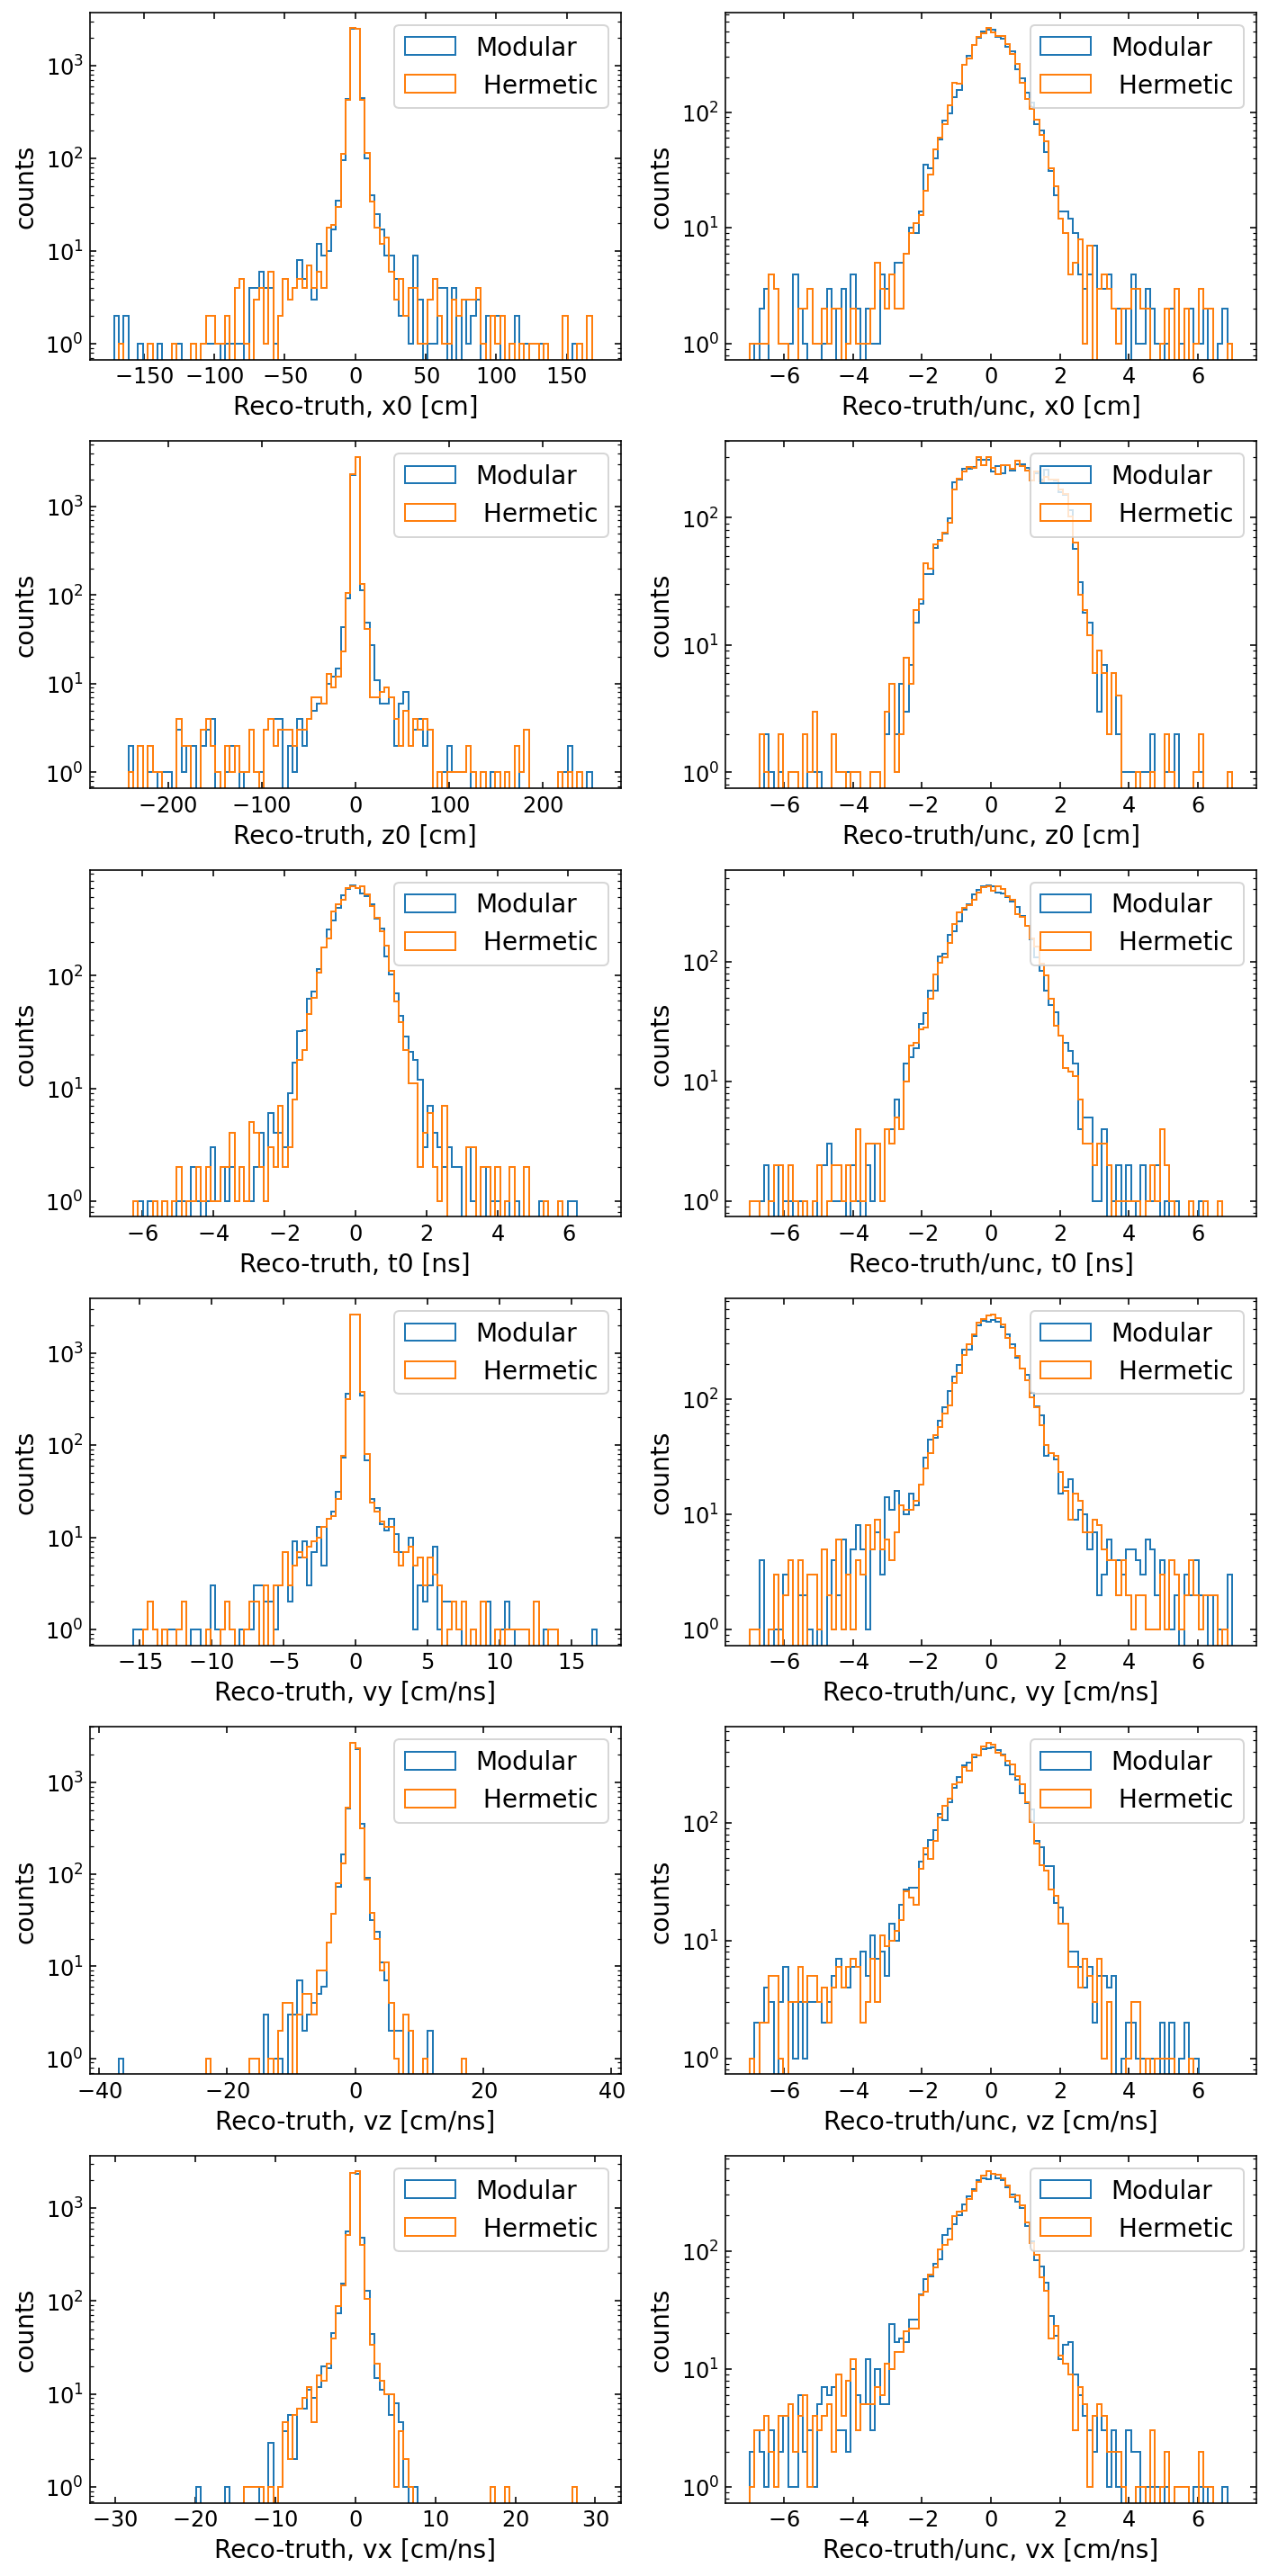

In [121]:
def pull(res, unc):
    return res/unc
par_names=['x0','z0', 't0', 'vy', 'vz', 'vx'] # Use real world direction
par_unit= ['[cm]',"[cm]", "[ns]","[cm/ns]","[cm/ns]","[cm/ns]"]
label= ["Modular"," Hermetic"]
fig,axs=plt.subplots(6,2,figsize=(10,20))



#Define Cuts
res={}
unc={}
rese=[]
ind=[]
uncert=[]
for j in range(len(dict_)):
    data=dict_[j]
    residual=[]
    uncerinty=[]
    for i in range(len(data["mask_recon_success"])):
        if(data["mask_recon_success"][i]==True   and data["floor_hit"][i] !=True and data["wall_hit"][i] ==True ):
            ind.append(data["par_km_ndigitrack"][i])
            residual.append(data["residual_km"][i])
            uncerinty.append(data["unc"][i])
        else:
            continue
    rese.append(residual)
    uncert.append(uncerinty)
        
        
        
res["0"]=np.array(rese[0])
unc["0"]=np.array(uncert[0])
res["1"]=np.array(rese[1])
unc["1"]=np.array(uncert[1])
_range_pull=[-7,7]

for ipar in range(6):

    _range=(np.percentile(res[f"{1}"][:,ipar],1)*2,np.percentile(res[f"{1}"][:,ipar],99)*2)
    _range=(-max(np.abs(_range))*2,max(np.abs(_range))*2)
    for i in range(2):

        axs[ipar][0].hist(res[f"{i}"][:,ipar],bins=100,range=_range,histtype="step",label=label[i]);        
        axs[ipar][1].hist(res[f"{i}"][:,ipar]/unc[f"{i}"][:,ipar],bins=100,range=_range_pull,histtype="step",label=label[i]);

        axs[ipar][0].set_xlabel(f"Reco-truth, {par_names[ipar]} {par_unit[ipar]}")
        axs[ipar][0].set_ylabel("counts")
        axs[ipar][0].set_yscale("log")
        axs[ipar][0].legend()  
   
        axs[ipar][1].set_xlabel(f"Reco-truth/unc, {par_names[ipar]} {par_unit[ipar]}")
        axs[ipar][1].set_ylabel("counts")
        axs[ipar][1].set_yscale("log")
        axs[ipar][1].legend()
#handles, labels = axs[0][1].get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower left',ncol=4,mode="expand", bbox_to_anchor=(0.05,1.002, 0.9,0.03))
tight_layout()
plt.show


In [183]:
#ev=event.Event("/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/Grid/Angular/20230605/063043/stat0.root",EventNumber=8)
#vis.plot_recon(ev)
# 0:original   1:cuts 2: hermatic
ipar=0
data=dict_[ipar]

In [184]:
sum(data["wall_hit"]&data["mask_recon_success"])/sum(data["wall_hit"])

0.8178318447797968

In [182]:
new = sum(data["wall_hit"]&data["mask_recon_success"])/sum(data["wall_hit"])

0.8263671515374701

<BarContainer object of 1 artists>

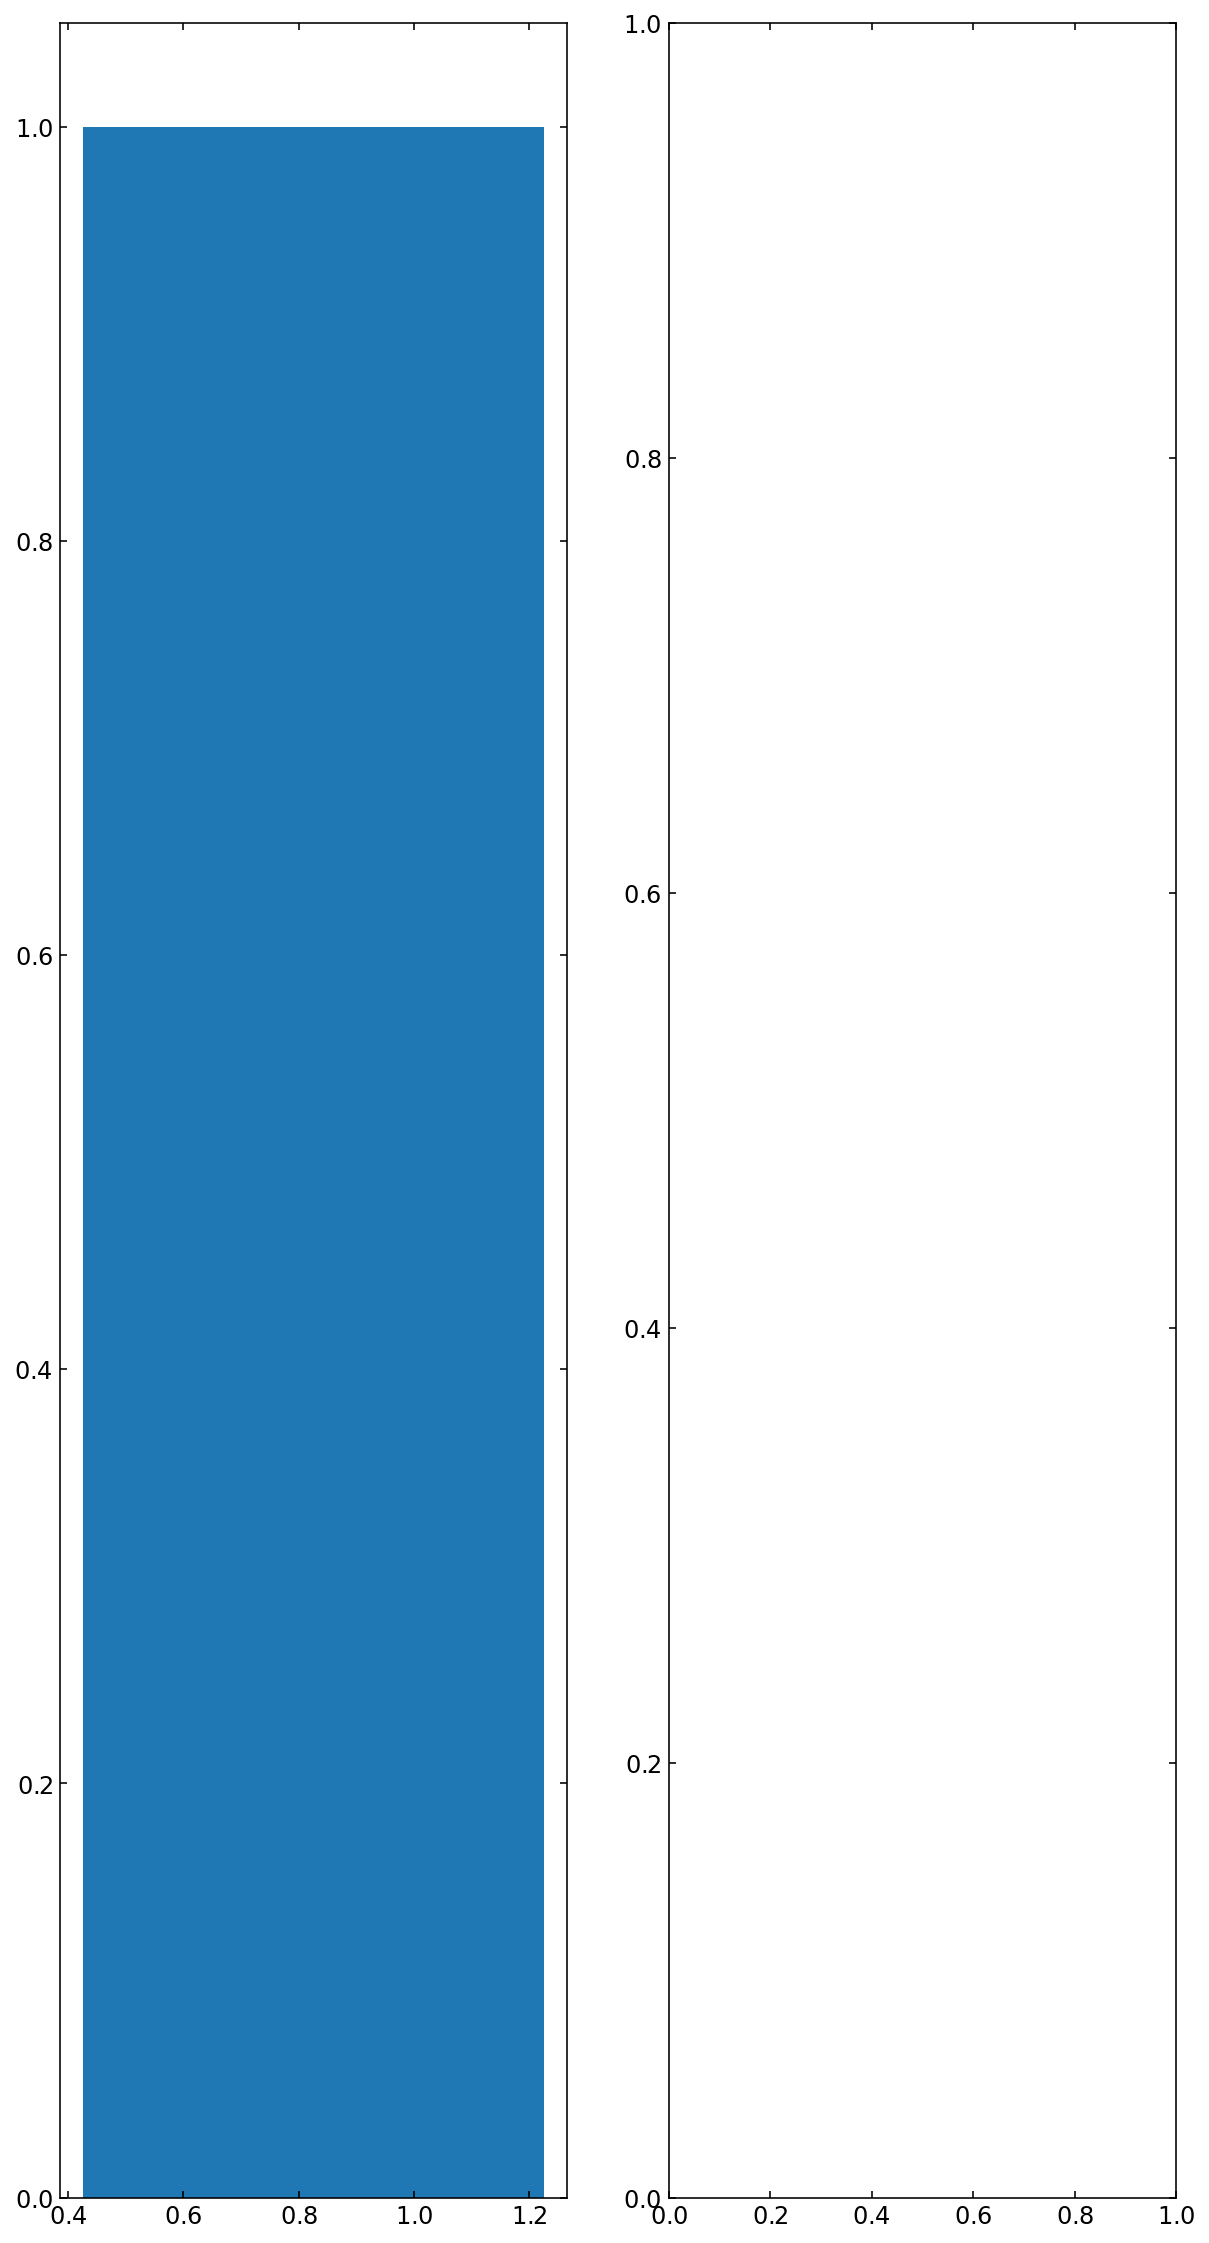

In [181]:
fig,axs=plt.subplots(1,2,figsize=(10,20))
axs[0].bar(sum(data["wall_hit"]&data["mask_recon_success"])/sum(data["wall_hit"]), 1 , width=0.8,  align='center')


In [167]:
# Make a fixed range cut for tight and looser track
#data=lsfit.get_km(f"{Data_Dir}/hermtic_floor.root")
recon = data["recon"]
truth = data["truth"]
diffx = recon[:,0]-truth[:,0]
diffy = recon[:,2]-truth[:,2]
diffvx = recon[:,4]-truth[:,4]
diffvy = recon[:,5]-truth[:,5] 
mask_TIGHT  = (np.abs(diffx)<5) & (np.abs(diffy)<5) & (np.abs(diffvx)<0.5) & (np.abs(diffvy)<0.5)
mask_LOOSER = (np.abs(diffx)<10) & (np.abs(diffy)<10) & (np.abs(diffvx)<1) & (np.abs(diffvy)<1)
mask_Super_LOOSE = (np.abs(diffx)<15) & (np.abs(diffy)<15) & (np.abs(diffvx)<1.5) & (np.abs(diffvy)<1.5)

eta=[]
phi=[]
data["eta"] = np.arctanh(data["truth"][:,6]/np.sqrt(data["truth"][:,4]**2 +data["truth"][:,5]**2 + data["truth"][:,6]**2))
data["phi"] = np.arctan(data["truth"][:,4]/data["truth"][:,5])
for i in range(len(data["eta"])):
    eta.append(data["eta"][i])
    phi.append(data["phi"][i])
n_cuts = 10
bins_eta = np.linspace(0.6,1.4, n_cuts+1)
bincenters_eta = 0.5*(bins_eta[1:]+bins_eta[:-1])
bins_phi = np.linspace(-0.68,0.68, n_cuts+1)
bincenters_phi = 0.5*(bins_phi[1:]+bins_phi[:-1])
trackeff=[]

for i in range(n_cuts):
    eff = []
    mask = (eta>bins_eta[i])&(eta<bins_eta[i+1])
    for j in range(n_cuts):
        mask_phi = (phi>bins_phi[j])&(phi<bins_phi[j+1])    
        n_pass = sum(data["mask_recon_success"]&mask&mask_phi&data["wall_hit"])
        n_total = sum(mask&mask_phi)
        eff.append(n_pass/n_total)
    trackeff.append(eff)
trr=np.array(trackeff)

/home/knownothing/anaconda3/envs/tracker/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars


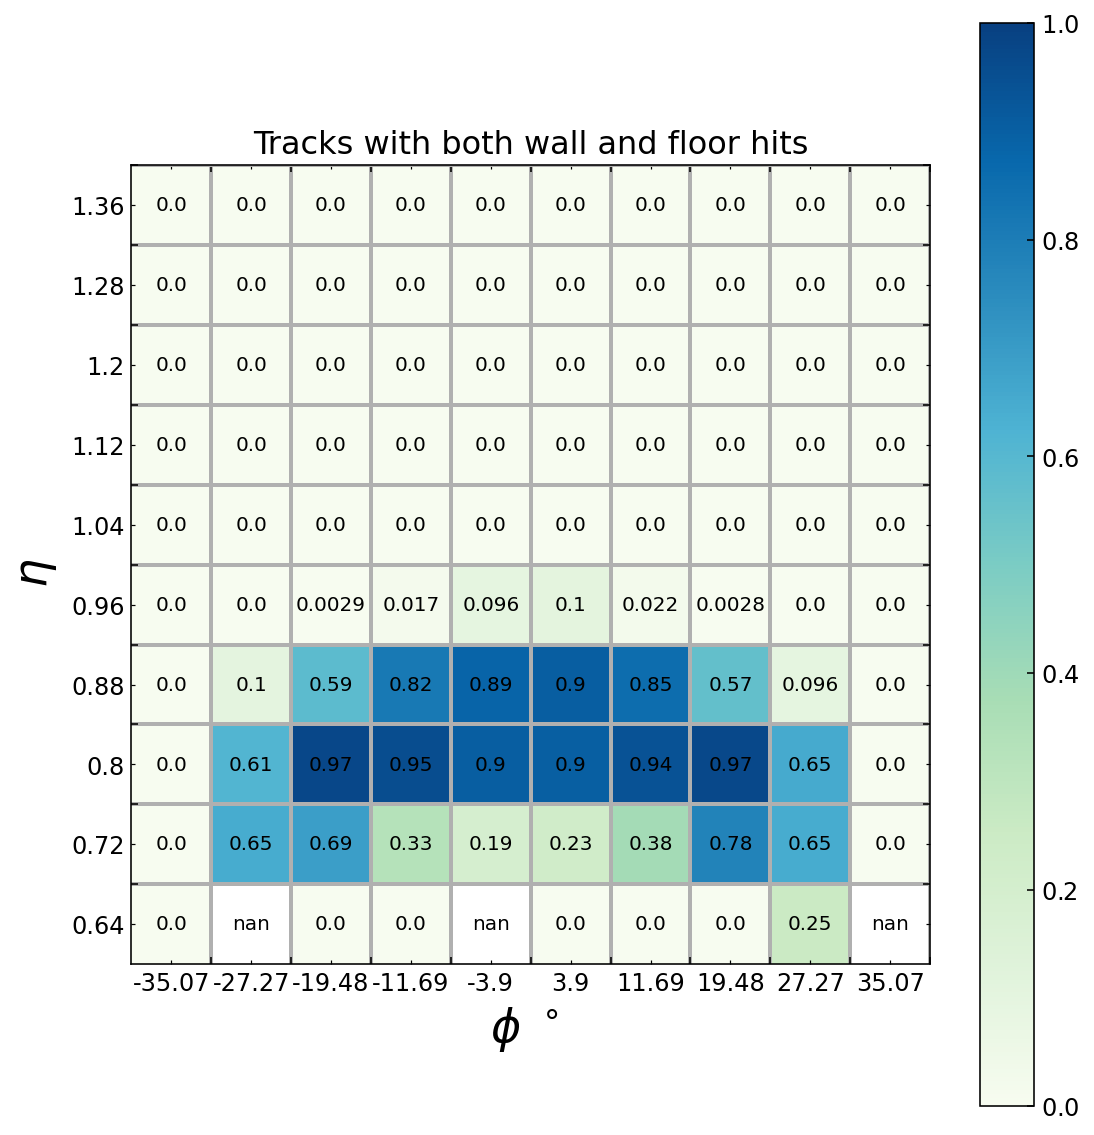

In [168]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


fig, ax = plt.subplots(figsize=(8,8))
nx, ny = trr.shape
indx, indy = np.arange(nx), np.arange(ny)
x, y = np.meshgrid(indx, indy)
im=ax.imshow(trr, interpolation='nearest',cmap="GnBu" ,vmin=0, vmax=1 ) # plot grid values

for xval, yval in zip(x.flatten(), y.flatten()):
    zval = trr[yval,xval]

    t = "{0:.2}".format(zval) # format value with 1 decimal point
    #c = 'w' if zval > 0.75 else 'k' # if dark-green, change text color to white
    ax.text(xval, yval, t, va='center', ha='center')
#set tick marks for grid
xlabels = np.round(bincenters_phi/np.pi*180,2)
ylabels = np.round(bincenters_eta,2)
ax.set_xticks(indx+0.5) # offset x/y ticks so gridlines run on border of boxes
ax.set_yticks(indy+0.5)
ax.grid(ls='-', lw=2)
# the tick labels, if you want them centered need to be adjusted in
# this special way.
for a, ind, labels in zip((ax.xaxis, ax.yaxis), (indx, indy),
                          (xlabels, ylabels)):
    a.set_major_formatter(ticker.NullFormatter())
    a.set_minor_locator(ticker.FixedLocator(ind))
    a.set_minor_formatter(ticker.FixedFormatter(labels))

fig.colorbar(im)
ax.invert_yaxis()
label = ax.set_ylabel(r'$\eta$  ', fontsize=23, c="black")
label = ax.set_xlabel(r'$\phi$ $^\circ$ ', fontsize= 23, c="black")
ax.xaxis.set_label_coords(0.5, -0.05)
ax.yaxis.set_label_coords(-0.09, 0.5)
fig.tight_layout()
ax.set_title("Tracks with both wall and floor hits")
plt.show()


In [253]:
np.sqrt(65.5**2+119**2)

135.83537830771482

In [492]:
eta2theta(0.8)

48.310634031852636